In [27]:
import pandas as pd
import numpy as np 
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import 

In [13]:
df = pd.read_csv('saveecobot_17113.csv')
df

,device_id,phenomenon,value,logged_at,value_text
0,17113,pm1,1.626000e+01,2021-03-28 00:00:21,NaN
1,17113,pm25,2.712000e+01,2021-03-28 00:00:21,NaN
2,17113,pm10,4.213000e+01,2021-03-28 00:00:21,NaN
3,17113,pressure_pa,1.024480e+06,2021-03-28 00:00:21,NaN
4,17113,humidity,6.526000e+01,2021-03-28 00:00:21,NaN
...,...,...,...,...,...
808167,17113,temperature,2.051000e+01,2023-09-05 21:15:09,NaN
808168,17113,no2_ug,5.519000e+01,2023-09-05 21:15:09,NaN
808169,17113,o3_ug,6.464000e+01,2023-09-05 21:15:09,NaN
808170,17113,no2_ppb,2.862290e+01,2023-09-05 21:15:09,NaN


In [14]:
df = df.drop("value_text", axis=1)
df

,device_id,phenomenon,value,logged_at
0,17113,pm1,1.626000e+01,2021-03-28 00:00:21
1,17113,pm25,2.712000e+01,2021-03-28 00:00:21
2,17113,pm10,4.213000e+01,2021-03-28 00:00:21
3,17113,pressure_pa,1.024480e+06,2021-03-28 00:00:21
4,17113,humidity,6.526000e+01,2021-03-28 00:00:21
...,...,...,...,...
808167,17113,temperature,2.051000e+01,2023-09-05 21:15:09
808168,17113,no2_ug,5.519000e+01,2023-09-05 21:15:09
808169,17113,o3_ug,6.464000e+01,2023-09-05 21:15:09
808170,17113,no2_ppb,2.862290e+01,2023-09-05 21:15:09


In [15]:
for column in df.columns:
    unique_count = df[column].nunique()
    unique_values = df[column].unique()
    print(f"Column '{column}' has {unique_count} unique values:")
    print(unique_values)

Column 'device_id' has 1 unique values:
[17113]
Column 'phenomenon' has 10 unique values:
['pm1' 'pm25' 'pm10' 'pressure_pa' 'humidity' 'temperature' 'no2_ug'
 'o3_ug' 'no2_ppb' 'o3_ppb']
Column 'value' has 161931 unique values:
[16.26   27.12   42.13   ... 35.0414 28.6229 32.1341]
Column 'logged_at' has 80813 unique values:
['2021-03-28 00:00:21' '2021-03-28 00:04:29' '2021-03-28 00:22:04' ...
 '2023-09-05 20:45:08' '2023-09-05 21:00:11' '2023-09-05 21:15:09']


In [17]:
df_pm25 = df[df["phenomenon"].isin(["pm25"])]
df_pm25

,device_id,phenomenon,value,logged_at
1,17113,pm25,27.12,2021-03-28 00:00:21
11,17113,pm25,26.98,2021-03-28 00:04:29
21,17113,pm25,26.93,2021-03-28 00:22:04
31,17113,pm25,26.93,2021-03-28 00:23:03
41,17113,pm25,27.93,2021-03-28 00:43:48
...,...,...,...,...
808123,17113,pm25,3.87,2023-09-05 20:15:09
808133,17113,pm25,4.08,2023-09-05 20:30:10
808143,17113,pm25,4.35,2023-09-05 20:45:08
808153,17113,pm25,4.54,2023-09-05 21:00:11


In [18]:
df_pm10 = df[df["phenomenon"].isin(["pm10"])]
df_pm10

,device_id,phenomenon,value,logged_at
2,17113,pm10,42.13,2021-03-28 00:00:21
12,17113,pm10,41.92,2021-03-28 00:04:29
22,17113,pm10,41.84,2021-03-28 00:22:04
32,17113,pm10,41.84,2021-03-28 00:23:03
42,17113,pm10,43.38,2021-03-28 00:43:48
...,...,...,...,...
808124,17113,pm10,5.77,2023-09-05 20:15:09
808134,17113,pm10,6.12,2023-09-05 20:30:10
808144,17113,pm10,6.50,2023-09-05 20:45:08
808154,17113,pm10,6.76,2023-09-05 21:00:11


In [19]:
df_temperature = df[df["phenomenon"].isin(["temperature"])]
df_temperature

,device_id,phenomenon,value,logged_at
5,17113,temperature,8.00,2021-03-28 00:00:21
15,17113,temperature,7.96,2021-03-28 00:04:29
25,17113,temperature,7.78,2021-03-28 00:22:04
35,17113,temperature,7.78,2021-03-28 00:23:03
45,17113,temperature,7.58,2021-03-28 00:43:48
...,...,...,...,...
808127,17113,temperature,22.39,2023-09-05 20:15:09
808137,17113,temperature,21.71,2023-09-05 20:30:10
808147,17113,temperature,21.30,2023-09-05 20:45:08
808157,17113,temperature,20.90,2023-09-05 21:00:11


In [20]:
df_no2_ug = df[df["phenomenon"].isin(["no2_ug"])]
df_no2_ug

,device_id,phenomenon,value,logged_at
6,17113,no2_ug,119.35,2021-03-28 00:00:21
16,17113,no2_ug,119.28,2021-03-28 00:04:29
26,17113,no2_ug,121.92,2021-03-28 00:22:04
36,17113,no2_ug,121.92,2021-03-28 00:23:03
46,17113,no2_ug,129.63,2021-03-28 00:43:48
...,...,...,...,...
808128,17113,no2_ug,58.00,2023-09-05 20:15:09
808138,17113,no2_ug,57.05,2023-09-05 20:30:10
808148,17113,no2_ug,56.22,2023-09-05 20:45:08
808158,17113,no2_ug,55.53,2023-09-05 21:00:11


In [26]:
df[df["phenomenon"] == 'no2_ug']

,device_id,phenomenon,value,logged_at
6,17113,no2_ug,119.35,2021-03-28 00:00:21
16,17113,no2_ug,119.28,2021-03-28 00:04:29
26,17113,no2_ug,121.92,2021-03-28 00:22:04
36,17113,no2_ug,121.92,2021-03-28 00:23:03
46,17113,no2_ug,129.63,2021-03-28 00:43:48
...,...,...,...,...
808128,17113,no2_ug,58.00,2023-09-05 20:15:09
808138,17113,no2_ug,57.05,2023-09-05 20:30:10
808148,17113,no2_ug,56.22,2023-09-05 20:45:08
808158,17113,no2_ug,55.53,2023-09-05 21:00:11


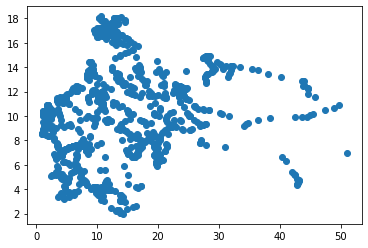

In [53]:
xpoints = df_pm25['value'].iloc[:1000]
ypoints = df_temperature['value'].iloc[:1000]

plt.plot(xpoints, ypoints, 'o')

plt.show()

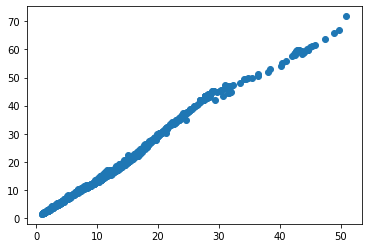

In [55]:
xpoints = df_pm25['value'].iloc[:1000]
ypoints = df_pm10['value'].iloc[:1000]

plt.plot(xpoints, ypoints, 'o')

plt.show()

In [56]:
df_pm25['logged_at'] = pd.to_datetime(df_pm25['logged_at'])
df_pm25['hour'] = df_pm25['logged_at'].dt.hour
df_pm25


C:\Users\valer\AppData\Local\Temp\ipykernel_12592\2203954535.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pm25['logged_at'] = pd.to_datetime(df_pm25['logged_at'])
C:\Users\valer\AppData\Local\Temp\ipykernel_12592\2203954535.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pm25['hour'] = df_pm25['logged_at'].dt.hour


,device_id,phenomenon,value,logged_at,hour
1,17113,pm25,27.12,2021-03-28 00:00:21,0
11,17113,pm25,26.98,2021-03-28 00:04:29,0
21,17113,pm25,26.93,2021-03-28 00:22:04,0
31,17113,pm25,26.93,2021-03-28 00:23:03,0
41,17113,pm25,27.93,2021-03-28 00:43:48,0
...,...,...,...,...,...
808123,17113,pm25,3.87,2023-09-05 20:15:09,20
808133,17113,pm25,4.08,2023-09-05 20:30:10,20
808143,17113,pm25,4.35,2023-09-05 20:45:08,20
808153,17113,pm25,4.54,2023-09-05 21:00:11,21


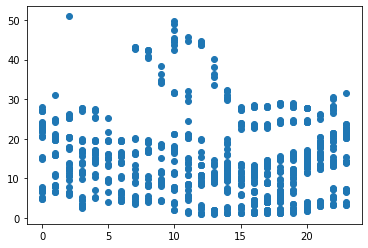

In [59]:
ypoints = df_pm25['value'].iloc[:1000]
xpoints = df_pm25['hour'].iloc[:1000]

plt.plot(xpoints, ypoints, 'o')

plt.show()